In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import xarray as xr

position_info = xr.open_dataset('Jaq_03_16_linearised_position_nose.nc').to_dataframe()
position_info

,nose_x,nose_y,nose_vel,tailBase_x,tailBase_y,tailBase_vel,tailMid_x,tailMid_y,tailMid_vel,tailTip_x,...,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,,,,,,,,,,,
0 days 06:13:09.082875307,6.077277,4.392700,49.138982,6.716269,2.806309,41.961503,11.931347,11.807503,64.686498,21.186823,...,Right Arm,1,,,,False,,328.082983,-0.034664,0.034664
0 days 06:13:09.084875307,6.131868,4.436402,49.271686,6.777000,2.829514,42.016360,12.014969,11.853275,64.229999,21.324159,...,Right Arm,1,,,,False,,328.137340,-0.034664,0.034664
0 days 06:13:09.086875307,6.186460,4.480105,49.404389,6.837732,2.852719,42.071218,12.098590,11.899047,63.773501,21.461495,...,Right Arm,1,,,,False,,328.191697,-0.069329,0.069329
0 days 06:13:09.088875307,6.241051,4.523807,49.537092,6.898463,2.875924,42.126075,12.182212,11.944819,63.317003,21.598832,...,Right Arm,1,,,,False,,328.246053,-0.103995,0.103995
0 days 06:13:09.090875307,6.295643,4.567509,49.669796,6.959195,2.899129,42.180932,12.265834,11.990591,62.860505,21.736168,...,Right Arm,1,,,,False,,328.300410,-0.138663,0.138663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 06:28:13.722875307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,Right Arm,211,,,,False,,325.654193,-1.186221,1.186221
0 days 06:28:13.724875307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,Right Arm,211,,,,False,,325.654193,-0.948985,0.948985
0 days 06:28:13.726875307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,Right Arm,211,,,,False,,325.654193,-0.711744,0.711744


In [20]:
results = xr.open_dataset('Jaq_03_16_cv_classifier_clusterless_vel_0_nose_alltime_results.nc')
posterior = results.acausal_posterior.sum('state')
results

<xarray.Dataset>
Dimensions:                                    (position: 164, state: 2, time: 452325)
Coordinates:
  * state                                      (state) object 'random_walk' '...
  * position                                   (position) float64 1.228 ... 4...
  * time                                       (time) float64 2.239e+04 ... 2...
Data variables:
    likelihood                                 (time, state, position) float64 ...
    causal_posterior                           (time, state, position) float64 ...
    acausal_posterior                          (time, state, position) float64 ...
    abs_distance_from_animal_position_causal   (time) float64 ...
    abs_distance_from_animal_position_acausal  (time) float64 ...
    rel_distance_from_animal_position_causal   (time) float64 ...
    rel_distance_from_animal_position_acausal  (time) float64 ...
    hpd_threshold_95_causal                    (time) float64 ...
    hpd_threshold_50_causal                    (time) float64 ...
    hpd_threshold_95_acausal                   (time) float64 ...
    hpd_threshold_50_acausal                   (time) float64 ...
    credible_interval_95_causal                (time) float64 ...
    credible_interval_50_causal                (time) float64 ...
    credible_interval_95_acausal               (time) float64 ...
    credible_interval_50_acausal               (time) float64 ...

In [4]:
from replay_trajectory_classification import ClusterlessClassifier

classifier = ClusterlessClassifier.load_model('Jaq_03_16_cv_classifier_nose.pkl')
classifier

ClusterlessClassifier(continuous_transition_types=[['random_walk', 'uniform'],
                                                   ['uniform', 'uniform']],
                      model_kwargs={'bandwidth': array([20., 20., 20., 20.,  8.])},
                      movement_var=6.0,
                      occupancy_kwargs={'bandwidth': array([20., 20., 20., 20.,  8.])},
                      occupancy_model=<class 'replay_trajectory_classification.misc.NumbaKDE'>,
                      place_bin_size=2.5, replay_speed=1)

In [5]:
from loren_frank_data_processing.position import make_track_graph
from src.parameters import ANIMALS

epoch_key = ("Jaq", 3, 16)
track_graph, _ = make_track_graph(epoch_key, ANIMALS)

In [21]:
from trajectory_analysis_tools import (get_distance_metrics,
                                       get_trajectory_data)



(actual_projected_position, actual_edges, directions,
 map_position_2d, map_edges) = get_trajectory_data(
    posterior, track_graph, classifier, position_info, direction_variable='body_dir')

distance_metrics = get_distance_metrics(track_graph, actual_projected_position, actual_edges,
                                        directions, map_position_2d, map_edges)

In [43]:
import pandas as pd
import numpy as np

ahead_behind = pd.DataFrame({'distance_ahead_behind': distance_metrics.mental_position_ahead_behind_animal *
                               distance_metrics.mental_position_distance_from_animal}
                           ).set_index(position_info.index / np.timedelta64(1, 's'))
ahead_behind

,distance_ahead_behind
time,
22389.082875,-98.409207
22389.084875,-98.354850
22389.086875,-98.300493
22389.088875,-98.246136
22389.090875,-98.191779
...,...
23293.722875,-98.348170
23293.724875,-98.348170
23293.726875,-100.837997


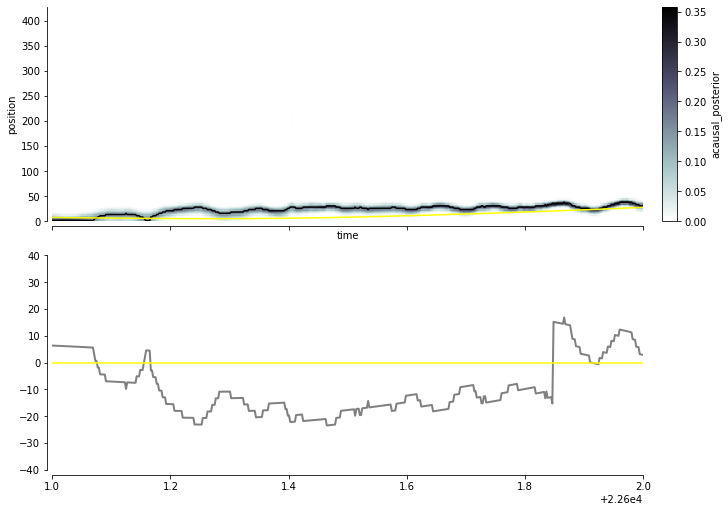

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

time_slice = slice(2.2601 * 1E4, 2.2606 * 1E4)
map_position_ind = (
    posterior.sel(time=time_slice).where(classifier.is_track_interior_).argmax(
        "position", skipna=True)
)
map_estimate = classifier.place_bin_centers_[map_position_ind].squeeze()
fig, axes = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(10, 7))
posterior.sel(time=time_slice).plot(x='time', y='position', ax=axes[0], cmap='bone_r')
axes[0].plot(posterior.sel(time=time_slice).time, map_estimate, color='black')
axes[0].plot(position_info.set_index(position_info.index / np.timedelta64(1, 's')).loc[time_slice].linear_position, color='yellow')
axes[1].plot(ahead_behind.loc[time_slice], color='grey', linewidth=2)
axes[1].axhline(0, color='yellow')
axes[1].set_ylim((-40, 40))
plt.xlim((22601, 22602))
sns.despine(offset=5)

In [137]:
blah = pd.DataFrame(np.concatenate((actual_projected_position, map_position_2d, actual_edges, map_edges), axis=1),
             columns=['actual_x', 'actual_y',
                      'map_x', 'map_y',
                      'actual_edge_x', 'actual_edge_y',
                      'map_edge_x', 'map_edge_y',
                     ]
            ).set_index(position_info.index / np.timedelta64(1, 's')).loc[time_slice]

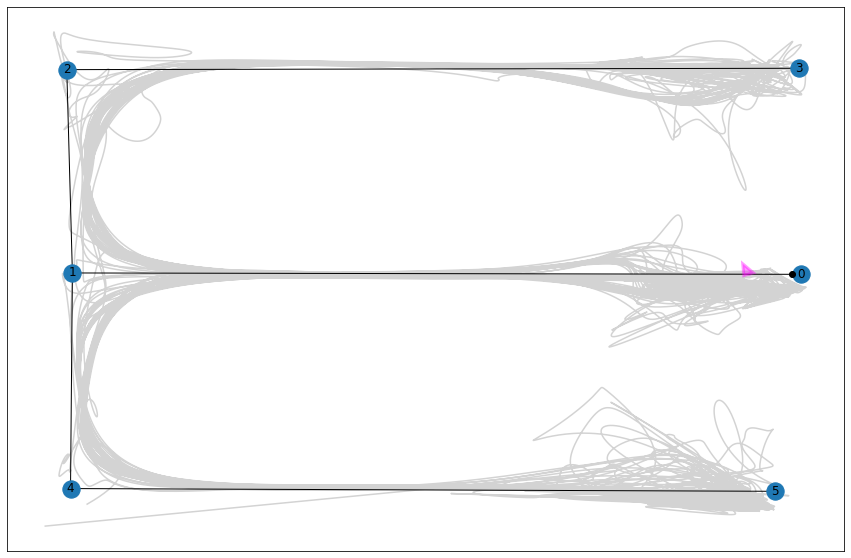

In [151]:
from loren_frank_data_processing.track_segment_classification import plot_track
plt.figure(figsize=(15, 10))
plt.plot(position_info.nose_x, position_info.nose_y, color='lightgrey', zorder=-1)
plot_track(track_graph)

t = slice(0, 1)
for (x, y), head_dir in zip(blah[['actual_x', 'actual_y']].values[t], directions[t]):
    plt.arrow(
        x,
        y,
        1e-5 * np.cos(head_dir),
        1e-5 * np.sin(head_dir),
        zorder=10,
        head_width=1.5,
        linewidth=3,
        color="magenta",
        alpha=0.4
    )
plt.scatter(blah.map_x.values[t], blah.map_y.values[t], color='black', zorder=11)

In [139]:
from trajectory_analysis_tools.distance import _setup_track_graph

copy_graph = track_graph.copy()

actual_pos = blah[['actual_x', 'actual_y']].values[0]
actual_edge = blah[['actual_edge_x', 'actual_edge_y']].values[0]
orientation = directions[0]
map_pos = blah[['map_x', 'map_y']].values[0]
map_edge = blah[['actual_edge_x', 'actual_edge_y']].values[0]

# Insert nodes for actual position, mental position, head
copy_graph = _setup_track_graph(
    copy_graph, actual_pos, actual_edge, orientation, map_pos,
    map_edge)

In [153]:
import pprint

pprint.pprint(dict(copy_graph.nodes(data=True)))

{0: {'pos': (109.54751131221721, 50.40983606557378)},
 1: {'pos': (3.9366515837104075, 50.68306010928963)},
 2: {'pos': (3.122171945701357, 91.39344262295083)},
 3: {'pos': (109.27601809954754, 91.66666666666669)},
 4: {'pos': (3.665158371040725, 7.5136612021858005)},
 5: {'pos': (105.74660633484166, 6.967213114754102)},
 'actual_position': {'pos': array([101.98610252,  50.42939806])},
 'head': {'pos': array([101.98610252,  50.42939806])},
 'mental_position': {'pos': array([108.31947806,  50.41301309])}}


In [156]:
pprint.pprint(dict(copy_graph.edges))

{(0, 1): {'distance': 105.61121315453394},
 ('actual_position', 'head'): {'distance': 0.0},
 ('actual_position', 'mental_position'): {'distance': 6.333396737283114},
 (0, 'mental_position'): {'distance': 1.2280373622620229},
 (1, 2): {'distance': 40.71852921569421},
 (1, 4): {'distance': 43.1702526117833},
 (1, 'head'): {'distance': 98.04977905498882},
 (2, 3): {'distance': 106.15419777207357},
 (4, 5): {'distance': 102.08291053794683}}


(0.0, 110.0)

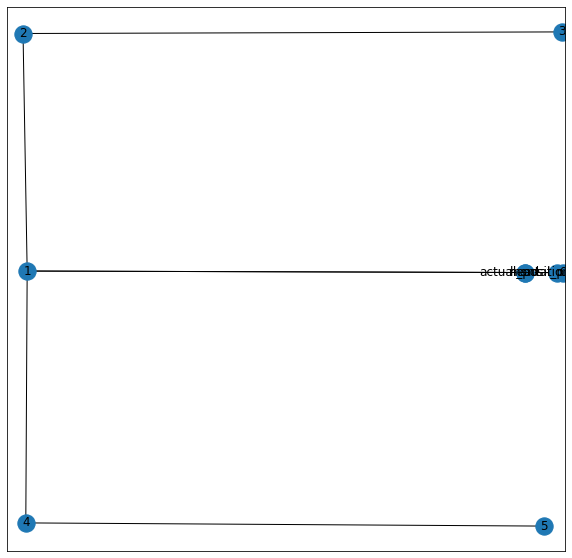

In [159]:
plt.figure(figsize=(10, 10))
plot_track(copy_graph)
plt.xlim((0, 110))

In [162]:
import networkx as nx

path = nx.shortest_path(
        copy_graph,
        source="actual_position",
        target="mental_position",
        weight="distance",
    )

1 if "head" in path else -1

-1

In [163]:
path

['actual_position', 'mental_position']

In [164]:
nx.shortest_path_length(
        copy_graph,
        source="actual_position",
        target="mental_position",
        weight="distance",
    )

6.333396737283114

In [169]:
ahead_behind.loc[time_slice]

,distance_ahead_behind
time,
22601.000875,6.333397
22601.002875,6.314592
22601.004875,6.295787
22601.006875,6.276982
22601.008875,6.258177
...,...
22605.990875,-21.087690
22605.992875,-21.174361
22605.994875,-21.260894


In [173]:
pd.DataFrame(
    {'mental_position_ahead_behind_animal': distance_metrics.mental_position_ahead_behind_animal
    }).set_index(position_info.index/np.timedelta64(1, 's')).loc[time_slice]

,mental_position_ahead_behind_animal
time,
22601.000875,1
22601.002875,1
22601.004875,1
22601.006875,1
22601.008875,1
...,...
22605.990875,-1
22605.992875,-1
22605.994875,-1


In [174]:

(actual_projected_position, actual_edges, directions,
 map_position_2d, map_edges) = get_trajectory_data(
    posterior.sel(time=time_slice),
    track_graph,
    classifier,
    position_info.set_index(position_info.index/np.timedelta64(1, 's')).loc[time_slice],
    direction_variable='body_dir')

distance_metrics = get_distance_metrics(track_graph, actual_projected_position, actual_edges,
                                        directions, map_position_2d, map_edges)

In [175]:
distance_metrics

,mental_position_ahead_behind_animal,mental_position_distance_from_animal
0,1,6.333397
1,1,6.314592
2,1,6.295787
3,1,6.276982
4,1,6.258177
...,...,...
2495,-1,21.087690
2496,-1,21.174361
2497,-1,21.260894
2498,-1,21.347427


In [177]:
from trajectory_analysis_tools.distance import _setup_track_graph, _calculate_ahead_behind, _calculate_distance

actual_orientation = directions
mental_position_2d = map_position_2d
mental_position_edges = map_edges

copy_graph = track_graph.copy()
mental_position_ahead_behind_animal = []
mental_position_distance_from_animal = []

for actual_pos, actual_edge, orientation, map_pos, map_edge in zip(
        actual_projected_position, actual_edges, actual_orientation,
        mental_position_2d, mental_position_edges):
    # Insert nodes for actual position, mental position, head
    copy_graph = _setup_track_graph(
        copy_graph, actual_pos, actual_edge, orientation, map_pos,
        map_edge)

    # Get metrics
    mental_position_distance_from_animal.append(
        _calculate_distance(copy_graph, source="actual_position",
                            target="mental_position")
    )
    mental_position_ahead_behind_animal.append(
        _calculate_ahead_behind(copy_graph, source="actual_position",
                                target="mental_position"))

    # Cleanup: remove inserted nodes
    copy_graph.remove_node("actual_position")
    copy_graph.remove_node("head")
    copy_graph.remove_node("mental_position")

In [179]:
mental_position_ahead_behind_animal[0]

1

In [180]:
mental_position_distance_from_animal[0]

6.333396737283114

In [184]:
copy_graph = track_graph.copy()
mental_position_ahead_behind_animal = []
mental_position_distance_from_animal = []

actual_pos = actual_projected_position[0]
actual_edge = actual_edges[0]
orientation = actual_orientation[0]
map_pos = mental_position_2d[0]
map_edge = mental_position_edges[0]


# Insert nodes for actual position, mental position, head
copy_graph = _setup_track_graph(
    copy_graph, actual_pos, actual_edge, orientation, map_pos,
    map_edge)

# Get metrics
mental_position_distance_from_animal.append(
    _calculate_distance(copy_graph, source="actual_position",
                        target="mental_position")
)
mental_position_ahead_behind_animal.append(
    _calculate_ahead_behind(copy_graph, source="actual_position",
                            target="mental_position"))

In [185]:
mental_position_distance_from_animal

[6.333396737283114]

In [186]:
mental_position_ahead_behind_animal

[1]

In [188]:
list(copy_graph.edges)

[(0, 1),
 (0, 'mental_position'),
 (1, 2),
 (1, 4),
 (1, 'actual_position'),
 (2, 3),
 (4, 5),
 ('actual_position', 'head'),
 ('head', 'mental_position')]

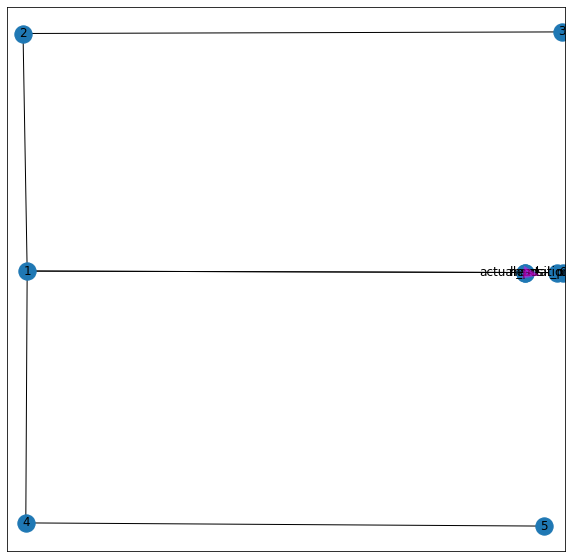

In [195]:
plt.figure(figsize=(10, 10))
plot_track(copy_graph)
plt.xlim((0, 110))
plt.arrow(
    actual_pos[0],
    actual_pos[1],
    1e-5 * np.cos(orientation),
    1e-5 * np.sin(orientation),
    zorder=10,
    head_width=1.5,
    linewidth=3,
    color="magenta",
    alpha=0.4
)

In [194]:
actual_orientation[0]

-0.15284038206357442

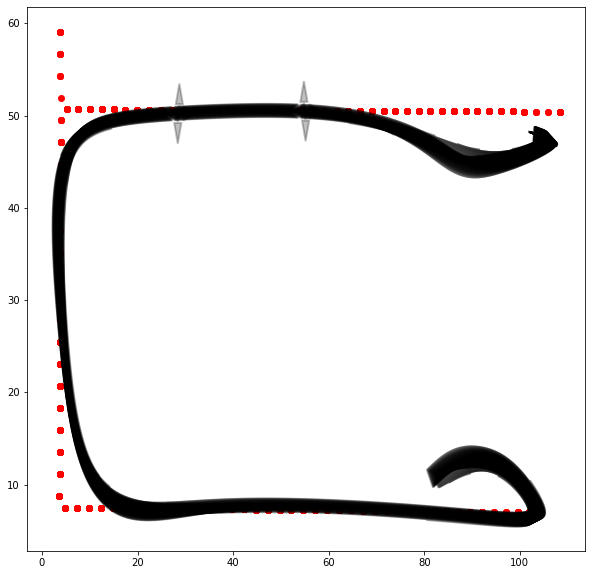

In [213]:
blah = position_info.set_index(position_info.index/np.timedelta64(1, 's')).loc[time_slice]
plt.figure(figsize=(10, 10))

for actual_pos, actual_edge, orientation, map_pos, map_edge in zip(
        blah[['nose_x', 'nose_y']].values, actual_edges, actual_orientation,
        mental_position_2d, mental_position_edges):
    plt.scatter(map_pos[0], map_pos[1], color='red', zorder=10)
    plt.arrow(
        actual_pos[0],
        actual_pos[1],
        1 * np.cos(orientation),
        1 * np.sin(orientation),
        zorder=10,
        head_width=1.5,
        linewidth=2,
        color="black",
        alpha=0.25
    )

In [214]:

(actual_projected_position, actual_edges, directions,
 map_position_2d, map_edges) = get_trajectory_data(
    posterior.sel(time=time_slice),
    track_graph,
    classifier,
    position_info.set_index(position_info.index/np.timedelta64(1, 's')).loc[time_slice],
    direction_variable='body_dir')

distance_metrics = get_distance_metrics(track_graph, actual_projected_position, actual_edges,
                                        directions, map_position_2d, map_edges)

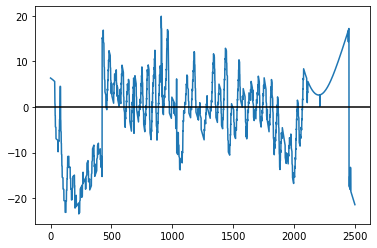

In [216]:
plt.plot(distance_metrics.mental_position_ahead_behind_animal *
                               distance_metrics.mental_position_distance_from_animal)
plt.axhline(0, color='black')